In [18]:
import pickle
import numpy as np
import pandas as pd
from tqdm.notebook import trange, tqdm
from itertools import repeat

In [8]:
from Bio.KEGG import REST

# Defina o KEGG ID da via (exemplo: via de câncer em humanos 'hsa05200')
pathway_id = "hsa05200"

# Obter detalhes da via do KEGG
pathway_info = REST.kegg_get(pathway_id).read()

# Inicializar lista para armazenar os genes
genes = []

# Flag para sinalizar quando estamos na seção GENE
in_gene_section = False

# Processar cada linha da resposta do KEGG para extrair os genes
for line in pathway_info.splitlines():
    if line.startswith("GENE"):  # Primeira linha que contém "GENE" marca o início da seção
        in_gene_section = True
        parts = line.split()
        gene_id = parts[1]  # Segundo item da linha é o ID do gene
        gene_name = " ".join(parts[2:]).split(';')[1]  # O restante é o nome e descrição do gene
        gene_symbol = " ".join(parts[2:]).split(';')[0]
        genes.append((gene_id, gene_symbol, gene_name, ))
    elif in_gene_section and line.startswith(" "):  # Linhas que continuam com genes começam com espaço
        parts = line.split()
        gene_id = parts[0]  # Primeiro item é o ID do gene
        gene_name = " ".join(parts[1:]).split(';')[1]  # O restante é o nome e descrição do gene
        gene_symbol = " ".join(parts[1:]).split(';')[0]
        genes.append((gene_id, gene_symbol, gene_name, ))
    elif not line.startswith(" "):  # Se encontrar outra seção (sem espaço), sair da seção GENE
        in_gene_section = False

# Exibir a lista de genes (ID e nome)
gene_symbols = []
for gene in genes:
    gene_symbols.append(gene[1])
    print(f"ID: {gene[0]}, Symbol: {gene[1]} Nome: {gene[2]}")

print(gene_symbols)

ID: 1630, Symbol: DCC Nome:  DCC netrin 1 receptor [KO:K06765]
ID: 836, Symbol: CASP3 Nome:  caspase 3 [KO:K02187] [EC:3.4.22.56]
ID: 842, Symbol: CASP9 Nome:  caspase 9 [KO:K04399] [EC:3.4.22.62]
ID: 26060, Symbol: APPL1 Nome:  adaptor protein, phosphotyrosine interacting with PH domain and leucine zipper 1 [KO:K08733]
ID: 999, Symbol: CDH1 Nome:  cadherin 1 [KO:K05689]
ID: 1499, Symbol: CTNNB1 Nome:  catenin beta 1 [KO:K02105]
ID: 29119, Symbol: CTNNA3 Nome:  catenin alpha 3 [KO:K05691]
ID: 1495, Symbol: CTNNA1 Nome:  catenin alpha 1 [KO:K05691]
ID: 1496, Symbol: CTNNA2 Nome:  catenin alpha 2 [KO:K05691]
ID: 8312, Symbol: AXIN1 Nome:  axin 1 [KO:K02157]
ID: 8313, Symbol: AXIN2 Nome:  axin 2 [KO:K04385]
ID: 324, Symbol: APC Nome:  APC regulator of WNT signaling pathway [KO:K02085]
ID: 10297, Symbol: APC2 Nome:  APC regulator of WNT signaling pathway 2 [KO:K02085]
ID: 2932, Symbol: GSK3B Nome:  glycogen synthase kinase 3 beta [KO:K03083] [EC:2.7.11.26]
ID: 6932, Symbol: TCF7 Nome:  tra

In [28]:
from Bio.KEGG import REST

# Defina o KEGG ID da via (exemplo: via de câncer em humanos 'hsa05200')
pathway_id = "hsa05225"

# Obter detalhes da via do KEGG
pathway_info = REST.kegg_get(pathway_id).read()

# Inicializar lista para armazenar os genes
genes = []

# Flag para sinalizar quando estamos na seção GENE
in_gene_section = False

# Processar cada linha da resposta do KEGG para extrair os genes
for line in pathway_info.splitlines():
    line = str(line)
    if line.startswith("GENE"):  # Primeira linha que contém "GENE" marca o início da seção
        in_gene_section = True
        line = line.replace("GENE", "    ")
        
    if (in_gene_section and not line[0] == " "):  # Se encontrar outra seção (sem espaço), sair da seção GENE
        in_gene_section = False
        
    if in_gene_section:
        parts = line.split()
        gene_id = parts[0]  # Primeiro item é o ID do gene
        gene_name = " ".join(parts[1:]).split(';')[1]  # O restante é o nome e descrição do gene
        gene_symbol = " ".join(parts[1:]).split(';')[0]
        genes.append((gene_id, gene_symbol, gene_name, ))

# Exibir a lista de genes (ID e nome)
gene_symbols = []
for gene in genes:
    gene_symbols.append(gene[1])
    #print(f"ID: {gene[0]}, Symbol: {gene[1]} Nome: {gene[2]}")

print(gene_symbols)


['TGFA', 'EGFR', 'IGF2', 'IGF1R', 'PLCG1', 'PLCG2', 'PRKCA', 'PRKCB', 'PRKCG', 'ELK1', 'SHC1', 'SHC2', 'SHC3', 'SHC4', 'GRB2', 'SOS1', 'SOS2', 'HRAS', 'KRAS', 'NRAS', 'ARAF', 'BRAF', 'RAF1', 'MAP2K1', 'MAP2K2', 'MAPK1', 'MAPK3', 'PIK3CA', 'PIK3CD', 'PIK3CB', 'PIK3R1', 'PIK3R2', 'PIK3R3', 'P3R3URF-PIK3R3', 'PTEN', 'AKT1', 'AKT2', 'AKT3', 'MTOR', 'RPS6KB1', 'RPS6KB2', 'BAD', 'BCL2L1', 'MYC', 'RB1', 'E2F1', 'E2F2', 'E2F3', 'TERT', 'TERC', 'TP53', 'CDKN1A', 'GADD45A', 'GADD45B', 'GADD45G', 'BAX', 'BAK1', 'DDB2', 'POLK', 'CDKN2A', 'CDK4', 'CDK6', 'CCND1', 'TGFB1', 'TGFB2', 'TGFB3', 'TGFBR1', 'TGFBR2', 'SMAD2', 'SMAD3', 'SMAD4', 'WNT1', 'WNT2', 'WNT2B', 'WNT3', 'WNT3A', 'WNT4', 'WNT5A', 'WNT5B', 'WNT6', 'WNT7A', 'WNT7B', 'WNT8A', 'WNT8B', 'WNT9A', 'WNT9B', 'WNT10B', 'WNT10A', 'WNT11', 'WNT16', 'FZD1', 'FZD7', 'FZD2', 'FZD3', 'FZD4', 'FZD5', 'FZD8', 'FZD6', 'FZD10', 'FZD9', 'LRP5', 'LRP6', 'DVL3', 'DVL2', 'DVL1', 'FRAT1', 'FRAT2', 'GSK3B', 'AXIN1', 'AXIN2', 'APC', 'APC2', 'CTNNB1', 'CSNK1A1L'

### Gene Symbols to Go Terms

In [24]:
from goatools.anno.gaf_reader import GafReader

# Carregar o arquivo GAF
gaf_fn = "goa_human.gaf"
gaf = GafReader(gaf_fn)

HMS:0:00:19.095238 773,774 annotations READ: goa_human.gaf 


In [29]:
# Função para obter os termos GO de um símbolo de gene
def get_go_terms_from_symbol(symbol):
    go_terms = set()
    
    # Percorre todas as anotações e encontra aquelas que correspondem ao símbolo do gene
    for annotation in gaf.associations:
        if annotation.DB_Symbol == symbol:
            go_terms.add(annotation.GO_ID)
    
    return go_terms

# Exemplo de uso
symbol = "FZD4"  # Substitua pelo símbolo do gene de interesse
go_terms = get_go_terms_from_symbol(symbol)

if go_terms:
    print(f"Termos GO para {symbol}: {go_terms}")
else:
    print(f"Nenhum termo GO encontrado para {symbol}")

Termos GO para FZD4: {'GO:0030165', 'GO:0005515', 'GO:0030335', 'GO:0030947', 'GO:0007223', 'GO:0004930', 'GO:0061304', 'GO:0009986', 'GO:0060856', 'GO:0045893', 'GO:0008283', 'GO:0016055', 'GO:0061299', 'GO:0019221', 'GO:0001666', 'GO:0017147', 'GO:0004896', 'GO:0031625', 'GO:0001525', 'GO:0042803', 'GO:0005886', 'GO:0042701', 'GO:0042813', 'GO:0010812', 'GO:0030182', 'GO:0046982', 'GO:0034446', 'GO:0030425', 'GO:0007186', 'GO:0030669', 'GO:0045446', 'GO:0050775', 'GO:0071300', 'GO:0110135', 'GO:0098978', 'GO:0001540', 'GO:0007605', 'GO:0044877', 'GO:0019955', 'GO:0031987', 'GO:0060070', 'GO:0001570', 'GO:0035426', 'GO:0035567', 'GO:1990830', 'GO:0150012', 'GO:0005911', 'GO:0051091', 'GO:0061301', 'GO:0038023'}


In [30]:
go_terms = set()
for gene_symbol in gene_symbols:
    for go_term in get_go_terms_from_symbol(gene_symbol):
        go_terms.add(go_term)
    

In [31]:
go_terms = set()
go_terms = {go_term for gene_symbol in gene_symbols for go_term in get_go_terms_from_symbol(gene_symbol)}
go_terms_liver_cancer = list(go_terms.copy())

In [32]:
len(go_terms_liver_cancer)

2617

In [33]:
go_terms_liver_cancer

['GO:0051219',
 'GO:0060978',
 'GO:0048754',
 'GO:0007056',
 'GO:0001938',
 'GO:0035987',
 'GO:0060561',
 'GO:0045579',
 'GO:0005114',
 'GO:0001934',
 'GO:2000785',
 'GO:0046621',
 'GO:0045842',
 'GO:0048741',
 'GO:0005925',
 'GO:0017124',
 'GO:0060762',
 'GO:0070885',
 'GO:0060502',
 'GO:0002088',
 'GO:1902462',
 'GO:0071944',
 'GO:0003964',
 'GO:0046930',
 'GO:0035019',
 'GO:0031966',
 'GO:0001726',
 'GO:0045656',
 'GO:0060674',
 'GO:0017018',
 'GO:0005635',
 'GO:0110076',
 'GO:0099170',
 'GO:0030326',
 'GO:0003360',
 'GO:0043154',
 'GO:1990711',
 'GO:0030297',
 'GO:0007281',
 'GO:0031490',
 'GO:0021762',
 'GO:0098609',
 'GO:0004725',
 'GO:0046466',
 'GO:0019003',
 'GO:0042177',
 'GO:1901798',
 'GO:0006468',
 'GO:1990402',
 'GO:0060638',
 'GO:0019894',
 'GO:0006417',
 'GO:0051204',
 'GO:0003323',
 'GO:0098973',
 'GO:0043276',
 'GO:0001658',
 'GO:2000726',
 'GO:0071839',
 'GO:0005783',
 'GO:0001894',
 'GO:0043406',
 'GO:0022407',
 'GO:0009954',
 'GO:0070257',
 'GO:0005759',
 'GO:00163

In [36]:
with open('./Data/go_terms_14520_U133A.pkl', 'rb') as arquivo:
    go_terms_14520_U133A = pickle.load(arquivo)

In [10]:
count = 0
for go_term in go_terms_14520_U133A:
    if go_term in go_terms_liver_cancer:
        count = count + 1

In [11]:
count

1746

In [39]:
from Similarity import Similarity_of_Two_GOTerms, Similarity_of_Set_of_GOTerms
import multiprocessing

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2024-06-17) 51,502 Terms; optional_attrs(relationship)


In [26]:
go_terms_values = np.empty([len(go_terms_14520_U133A),len(go_terms_liver_cancer)], dtype='float16')

In [53]:
pool = multiprocessing.Pool(48)
def f(gen1,gen2):
    return Similarity_of_Two_GOTerms(gen1, gen2, go, 'GOGO')

In [12]:
go_terms_values.shape

NameError: name 'go_terms_values' is not defined

In [14]:
# load Gene Ontology
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag

fin_dag = download_go_basic_obo("go-basic.obo")
go = GODag(fin_dag, optional_attrs={'relationship'}, load_obsolete=True)

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2024-06-17) 51,502 Terms; optional_attrs(relationship)


In [15]:
go_terms_liver_cancer = list(go_terms_liver_cancer)
for i in tqdm(range(len(go_terms_14520_U133A))):
    for j in range(len(go_terms_liver_cancer)):
        go_terms_values[i,j] = Similarity_of_Two_GOTerms(go_terms_14520_U133A[i], go_terms_liver_cancer[j], go, 'GOGO')
        

  0%|          | 0/9404 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [56]:
for i in trange(len(go_terms_14520_U133A)):
    gen1 = go_terms_14520_U133A[i]
    go_terms_values[i] = pool.starmap(f, zip(repeat(gen1), go_terms_liver_cancer))

  0%|          | 0/9404 [00:00<?, ?it/s]

In [34]:
#go_terms_values.shape
with open('Data/go_terms_14520_133A_liver_cancer.pkl', 'rb') as file:
    go_terms_values = pickle.load(file)

In [17]:
print(go_terms_values)

[[0.      0.1626  0.0824  ... 0.      0.0964  0.04434]
 [0.      0.0455  0.03033 ... 0.      0.03296 0.02242]
 [0.      0.05643 0.04346 ... 0.      0.04993 0.02571]
 ...
 [0.      0.0752  0.2734  ... 0.      0.2051  0.176  ]
 [0.      0.0416  0.08716 ... 0.      0.1076  0.1874 ]
 [0.      0.0412  0.0867  ... 0.      0.10754 0.1846 ]]


In [ ]:
go_terms_values[:,0]

In [37]:
#Globais
INDICES_go_terms_14520_U133A = dict(zip(go_terms_14520_U133A, range(len(go_terms_14520_U133A))))
INDICES_go_terms_liver_cancer = dict(zip(go_terms_liver_cancer, range(len(go_terms_liver_cancer))))

In [9]:
data = pd.read_pickle('Data/data_normalized.pkl')
colunas = list(data.columns)
colunas.remove('samples')
colunas.remove('type')
affymetrix_GO_terms_dict = dict(zip(pd.read_pickle('Data/affymetrix_GO_terms_dict.pkl')['ID'],pd.read_pickle('Data/affymetrix_GO_terms_dict.pkl')['GO term']))

In [40]:
scores_affymetrix_vs_liver_cancer = []
for i in trange(len(colunas)):
    gen1 = affymetrix_GO_terms_dict[colunas[i]]
    gen2 = go_terms_liver_cancer
    if gen1 != [] and gen2 != []:
        scores_affymetrix_vs_liver_cancer.append(Similarity_of_Set_of_GOTerms(gen1, gen2,
                                            method='pre_computed_GOGO',
                                            matrix_similarity = go_terms_values,
                                            go_labels_1 = INDICES_go_terms_14520_U133A,
                                            go_labels_2 = INDICES_go_terms_liver_cancer))
    else:
        scores_affymetrix_vs_liver_cancer.append(0)



  0%|          | 0/22277 [00:00<?, ?it/s]

In [7]:
INDICES_go_terms_liver_cancer['GO:0098680']

NameError: name 'INDICES_go_terms_liver_cancer' is not defined

In [41]:
scores_affymetrix_vs_liver_cancer

[0.284,
 0.132,
 0.167,
 0.353,
 0.219,
 0.176,
 0.376,
 0.087,
 0.324,
 0.138,
 0.316,
 0.302,
 0.127,
 0.415,
 0.334,
 0.249,
 0.315,
 0.192,
 0.098,
 0.32,
 0.086,
 0.184,
 0.15,
 0.15,
 0.229,
 0.149,
 0.308,
 0.125,
 0.198,
 0.198,
 0.167,
 0.19,
 0.15,
 0.15,
 0.205,
 0.258,
 0.145,
 0.412,
 0.172,
 0.157,
 0.174,
 0.302,
 0.15,
 0.15,
 0.168,
 0.175,
 0.15,
 0.085,
 0,
 0.15,
 0.112,
 0.15,
 0.15,
 0.3,
 0.173,
 0.163,
 0.19,
 0.175,
 0.222,
 0.241,
 0.259,
 0.186,
 0.171,
 0.119,
 0.159,
 0.178,
 0.261,
 0.281,
 0.22,
 0.172,
 0.107,
 0.195,
 0.177,
 0,
 0.349,
 0.174,
 0.173,
 0.213,
 0.153,
 0.42,
 0.184,
 0.173,
 0.157,
 0.271,
 0.296,
 0.228,
 0.166,
 0.133,
 0.109,
 0.146,
 0.091,
 0.118,
 0.086,
 0.203,
 0.163,
 0.14,
 0.097,
 0.156,
 0.14,
 0.14,
 0.27,
 0.233,
 0.164,
 0.273,
 0,
 0.206,
 0.136,
 0.218,
 0.15,
 0.15,
 0.215,
 0.162,
 0.15,
 0.221,
 0.181,
 0.193,
 0.17,
 0.233,
 0.132,
 0.228,
 0.168,
 0.168,
 0.148,
 0.148,
 0.148,
 0.233,
 0.233,
 0.206,
 0.212,
 0.38

In [5]:
import seaborn as sns

<Axes: ylabel='Count'>

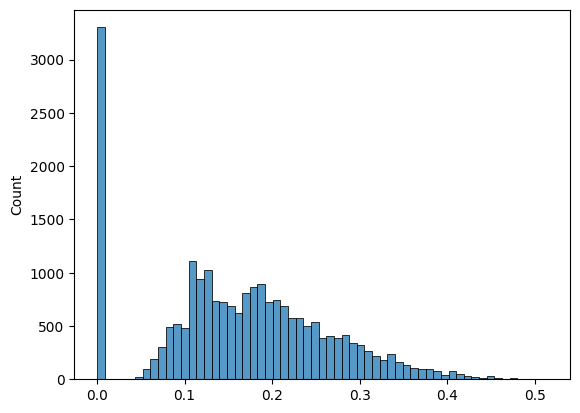

In [42]:
sns.histplot(x = scores_affymetrix_vs_liver_cancer)

In [44]:
with open('Data/scores_affymetrix_vs_liver_cancer.pkl', 'wb') as file:
    pickle.dump(scores_affymetrix_vs_liver_cancer, file)

In [3]:
with open('Data/scores_affymetrix_vs_liver_cancer.pkl', 'rb') as file:
    scores_affymetrix_vs_liver_cancer = pickle.load(file)